# `Jha et al. 2007`
Title: Improved Distances to Type Ia Supernovae with Multicolor Light-Curve Shapes: MLCS2k2  
Authors: Saurabh Jha, Adam G. Riess, and Robert P. Kirshner  
ADS: http://adsabs.harvard.edu/abs/2007ApJ...659..122J

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
#! mkdir ../data/Jha2007

## Table 1

Uncomment out the line below or download directly from the [Paper's ApJ Website](http://iopscience.iop.org/article/10.1086/512054/fulltext/63969.tb1.txt)

In [4]:
#! wget -P ../data/Jha_2007ApJ...659..122J/ -e html_extension=Off http://iopscience.iop.org/article/10.1086/512054/fulltext/63969.tb1.txt

In [5]:
! head -n 4 ../data/Jha2007/63969.tb1.txt


1972E	314.84	+30.08	404	190	678	Sd/Irr	-100.0	-38.0	+8.7	UBV	0.056	1
1980N	240.16	-56.63	1760	1633	1653	S0	-20.0	+220.0	-1.0	UBVRI	0.021	2
1981B	292.97	+64.74	1808	1662	2151	Sbc	+42.0	+39.0	-0.2	UBVR	0.018	3, 4


In [6]:
names = ['SN_Ia','galactic_longitude','galactic_latitude','cz_km_s_sun','cz_km_s_LG',
         'cz_km_s_CMB','morphological_type','SN_offset_N_as','SN_offset_E_as','t_1_days',
         'filters','E_B_V','Refs']

In [7]:
df_tbl1 = pd.read_csv('../data/Jha2007/63969.tb1.txt', names=names, 
                      delim_whitespace=True, na_values='\ldots')

In [8]:
df_tbl1.tail()

,SN_Ia,galactic_longitude,galactic_latitude,cz_km_s_sun,cz_km_s_LG,cz_km_s_CMB,morphological_type,SN_offset_N_as,SN_offset_E_as,t_1_days,filters,E_B_V,Refs
128,2002bf,156.46,50.08,7254,7327,7418,Sb,4.0,0.6,-9.9,BVRI,0.011,42
129,2002bo,213.04,54.85,1293,1184,1609,Sa,-14.2,11.6,-13.4,UBVRI,0.025,"34,"
130,2002cx,318.71,69.14,7184,7085,7494,NaN,-18.0,11.0,-5.3,BVRI,0.032,45
131,2002er,28.67,25.83,2568,2681,2563,Sc,4.7,-12.3,-7.5,UBVRI,0.157,46
132,2003du,101.18,53.21,1912,2081,1992,Sd/Irr,-13.5,-8.8,-4.7,BVRI,0.010,42


In [9]:
import matplotlib.ticker as plticker

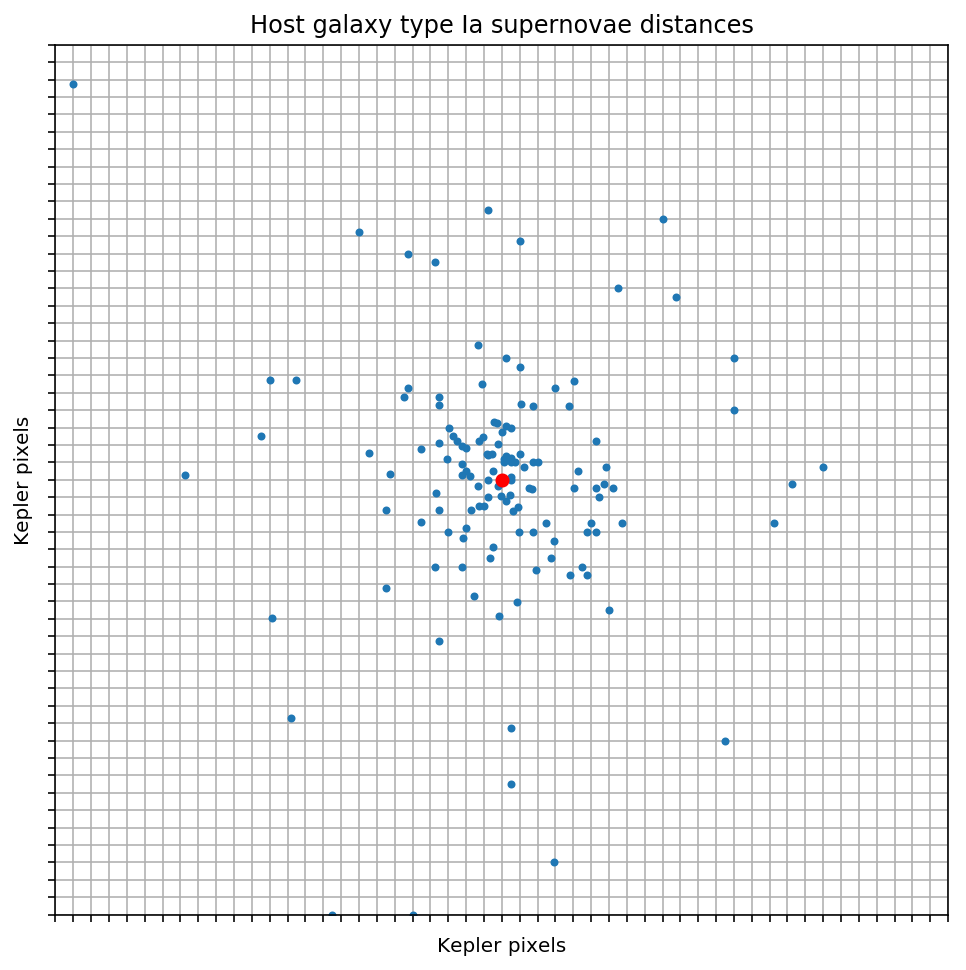

In [10]:
fig,ax=plt.subplots(figsize=(8,8))

#Spacing between each line
intervals = 1.0

loc = plticker.MultipleLocator(base=intervals)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

ax.plot(df_tbl1.SN_offset_E_as/4.0, df_tbl1.SN_offset_N_as/4.0, '.')
ax.plot([0], [0], 'ro')
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_title('Host galaxy type Ia supernovae distances')
ax.set_xlabel('Kepler pixels')
ax.set_ylabel('Kepler pixels');

In [11]:
rad_dist = np.sqrt(df_tbl1.SN_offset_E_as**2 + df_tbl1.SN_offset_N_as**2)

In [12]:
import seaborn as sns

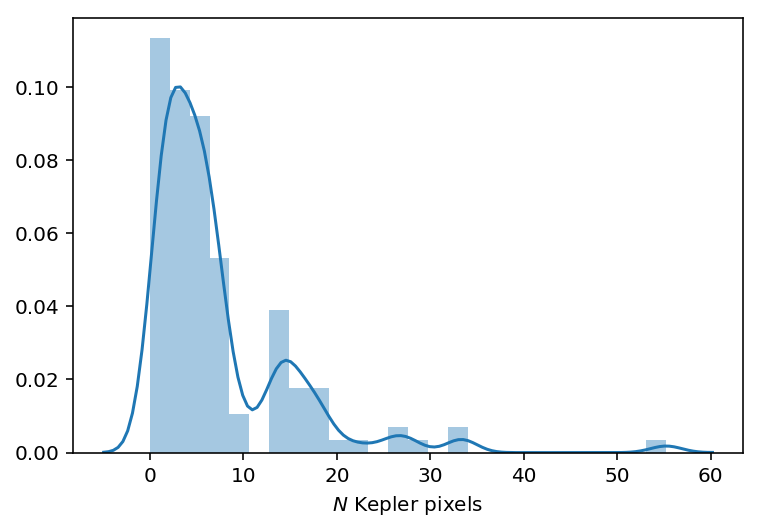

In [13]:
sns.distplot(rad_dist/4.0)
plt.xlabel('$N$ Kepler pixels');

In [14]:
np.percentile(rad_dist/4.0, 80)

12.97318622993243

Most supernovae fall with 13 Kepler pixels of the center of the Galaxy.